In [1]:
import pandas as pd
import numpy as np

In [19]:
empresa1 = pd.read_csv('data/estaticos_portfolio1.csv', index_col=0)
empresa2 = pd.read_csv('data/estaticos_portfolio2.csv', index_col=0)
empresa3 = pd.read_csv('data/estaticos_portfolio3.csv', index_col=0)

In [5]:
mercado = pd.read_csv('data/simplificado.csv', index_col=0)

In [10]:
mercado.shape

(462298, 20)

In [6]:
mercado.head()

,id,fl_matriz,sg_uf,natureza_juridica_macro,setor,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_optante_simples,fl_optante_simei,fl_simples_irregular,fl_passivel_iss,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,1,RN,ENTIDADES EMPRESARIAIS,CONSTRUÇÃO CIVIL,10 a 15,0,0,0,0,0,0,1,1,1,1,0,0,1,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,1,PI,OUTROS,SERVIÇO,1 a 5,0,0,0,1,0,0,1,1,1,0,0,0,1,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,1,AM,OUTROS,SERVIÇO,5 a 10,0,0,0,1,0,0,0,1,1,1,1,0,1,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,1,AM,OUTROS,SERVIÇO,5 a 10,0,0,0,0,0,0,1,1,1,1,0,0,1,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,1,RN,OUTROS,SERVIÇO,1 a 5,0,0,0,0,0,0,1,1,1,1,0,0,1,0


In [12]:
variaveis_categoricas = ['sg_uf', 'natureza_juridica_macro', 'setor', 'idade_emp_cat']
mercado_dummies = pd.get_dummies(mercado[variaveis_categoricas])

In [13]:
mercado_dummies.shape

(462298, 25)

In [14]:
mercado_dummies.head()

,sg_uf_AC,sg_uf_AM,sg_uf_MA,sg_uf_PI,sg_uf_RN,sg_uf_RO,natureza_juridica_macro_ADMINISTRACAO PUBLICA,natureza_juridica_macro_CARGO POLITICO,natureza_juridica_macro_ENTIDADES EMPRESARIAIS,natureza_juridica_macro_ENTIDADES SEM FINS LUCRATIVOS,...,setor_CONSTRUÇÃO CIVIL,setor_INDUSTRIA,setor_SERVIÇO,setor_SETOR INDEFINIDO,idade_emp_cat_1 a 5,idade_emp_cat_10 a 15,idade_emp_cat_15 a 20,idade_emp_cat_5 a 10,idade_emp_cat_<= 1,idade_emp_cat_> 20
0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [15]:
mercado.drop(columns=variaveis_categoricas, inplace=True)

In [16]:
mercado = mercado.merge(mercado_dummies, left_index=True, right_index=True)

In [17]:
mercado.shape

(462298, 41)

In [18]:
mercado.head()

,id,fl_matriz,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,...,setor_CONSTRUÇÃO CIVIL,setor_INDUSTRIA,setor_SERVIÇO,setor_SETOR INDEFINIDO,idade_emp_cat_1 a 5,idade_emp_cat_10 a 15,idade_emp_cat_15 a 20,idade_emp_cat_5 a 10,idade_emp_cat_<= 1,idade_emp_cat_> 20
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,1,0,0,0,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,1,0,0,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,1,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,1,0,0,0,0,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0


In [39]:
empresa1_ajustada = empresa1.copy()
empresa1_ajustada['Cliente'] = int(1)
empresa1_ajustada = empresa1_ajustada[['id','Cliente']]

In [88]:
empresa1_ajustada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 0 to 554
Data columns (total 2 columns):
id         555 non-null object
Cliente    555 non-null int64
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [106]:
cliente_empresa1 = pd.merge(mercado, empresa1_ajustada, on='id', how='outer')

In [109]:
cliente_empresa1['Cliente'] = cliente_empresa1['Cliente'].fillna(0).astype(int)

In [110]:
cliente_empresa1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462298 entries, 0 to 462297
Data columns (total 42 columns):
id                                                        462298 non-null object
fl_matriz                                                 462298 non-null int64
fl_me                                                     462298 non-null int64
fl_sa                                                     462298 non-null int64
fl_epp                                                    462298 non-null int64
fl_mei                                                    462298 non-null int64
fl_ltda                                                   462298 non-null int64
fl_st_especial                                            462298 non-null int64
fl_email                                                  462298 non-null int64
fl_telefone                                               462298 non-null int64
fl_rm                                                     462298 non-null int64
fl_optan

In [119]:
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

In [116]:
cliente_empresa1.shape

(462298, 42)

In [112]:
X = cliente_empresa1.iloc[:, 1:-1].values

In [113]:
y = cliente_empresa1.iloc[:, -1].values

In [114]:
X

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 0]])

In [115]:
normalizador = MinMaxScaler()

In [104]:
X = normalizador.fit_transform(X)

In [105]:
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [120]:
som = MiniSom(x = 36, y = 36, input_len = 40, random_seed = 42)

In [121]:
som.random_weights_init(X)

In [122]:
som.train_random(data=X, num_iteration = 100)

In [123]:
from pylab import pcolor, colorbar, plot

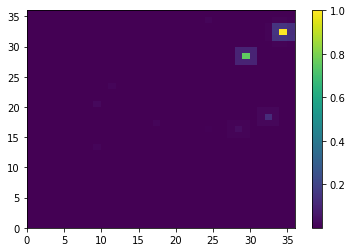

In [125]:
pcolor(som.distance_map().T);
colorbar()